In [15]:
#HW1

import geopandas as gpd

# Load the GeoPackage file directly from the URL
mapslink = "https://github.com/DACSS-CSSmeths/Spatial-Exploring/raw/refs/heads/main/maps/countriesCIA.gpkg"
gdf = gpd.read_file(mapslink)


/opt/anaconda3/lib/python3.12/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'countriesCIA.gpkg': 'cia' (default), 'border'. Specify layer parameter to avoid this warning.
  result = read_func(


In [16]:
# Check the layer of maps
gpd.list_layers(mapslink)

,name,geometry_type
0,cia,MultiPolygon
1,border,MultiPolygon


In [17]:
#Check the layer of data needed
cia=gpd.read_file(mapslink, layer='cia')


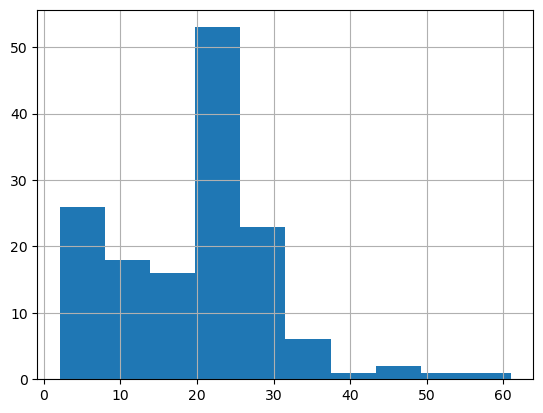

In [18]:
# Step1. Finding the best scheme to get 5 bins of the variable obesity.

import matplotlib.pyplot as plt

cia['obesityAdults_rate'].hist() 
plt.show()




In [19]:

#!pip install mapclassify pysal

# Import necessary libraries
import mapclassify 
import numpy as np
import pandas as pd

np.random.seed(12345) 

# let's try 5 bins
K=5
theVar=cia.obesityAdults_rate


# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)
# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 

###### based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed


In [20]:
#use the the Absolute deviation around class median (ADCM) to make the comparisson:

class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

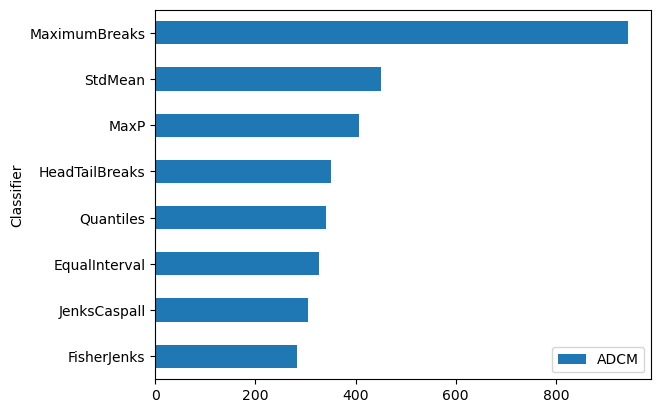

In [21]:
#plot the adcms:
adcms.sort_values('ADCM').plot.barh(x='Classifier')
plt.show();


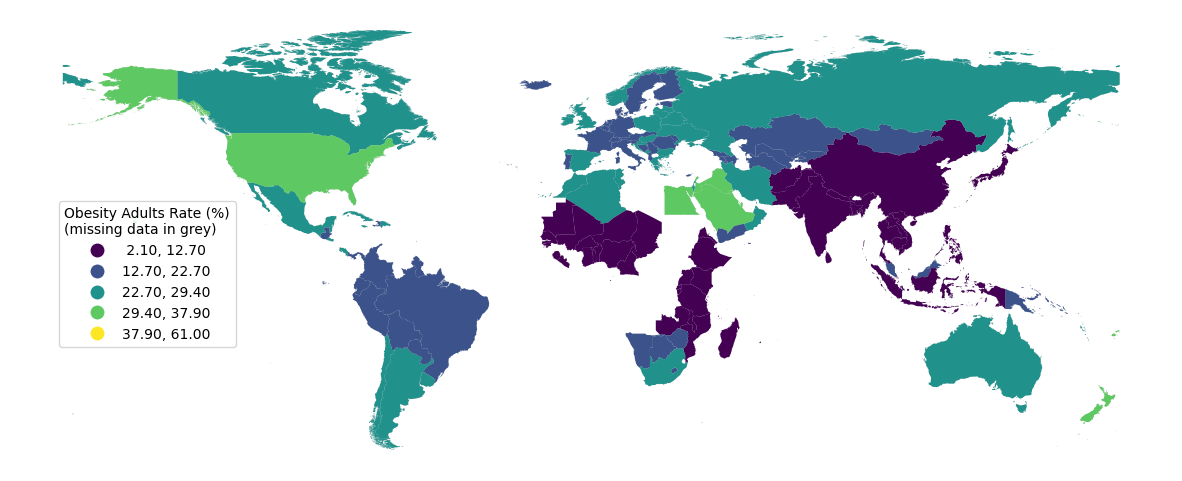

In [22]:
# The best scheme is 'Fisher Jenks',apply in plot

base=cia.plot(color='lightgrey',
                     figsize=(15, 10))
cia.plot(column='obesityAdults_rate', cmap='viridis', ax=base,
                     scheme="fisher_jenks",
                     linewidth=0., 
                     legend=True,
                     legend_kwds={"title": "Obesity Adults Rate (%)\n(missing data in grey)"}
                   )
leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.6)) #(left, bottom)
base.set_axis_off()
plt.show();

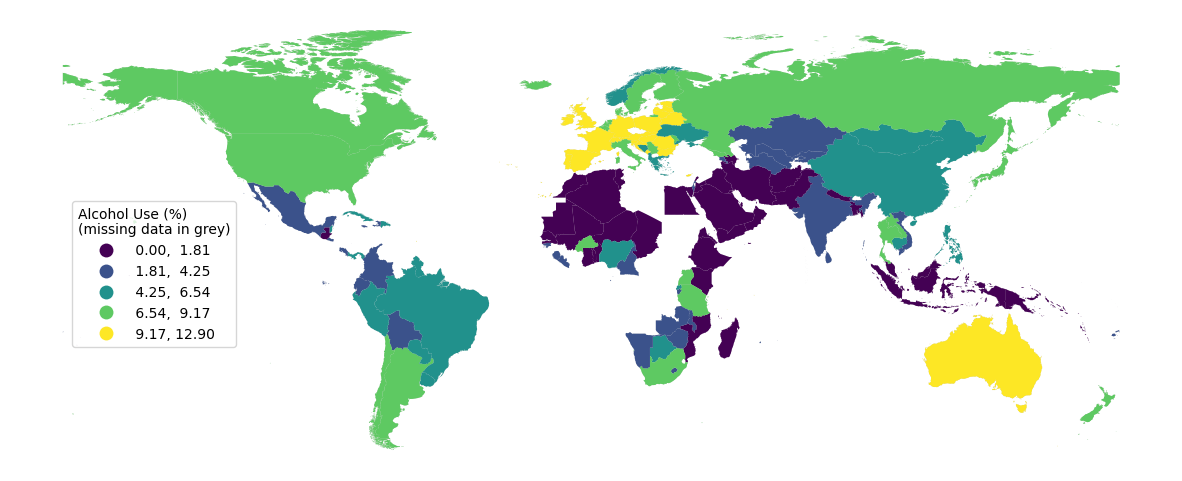

In [23]:
#Step 2: #1.Use the scheme you found in the previous step to bin the  columns on tobacco. 
base=cia.plot(color='lightgrey',
                     figsize=(15, 10))
cia.plot(column='Alcohol_LitersPerCap', cmap='viridis', ax=base,
                     scheme="fisher_jenks",
                     linewidth=0., 
                     legend=True,
                     legend_kwds={"title": "Alcohol Use (%)\n(missing data in grey)"}
                   )
leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.6)) #(left, bottom)
base.set_axis_off()
plt.show();


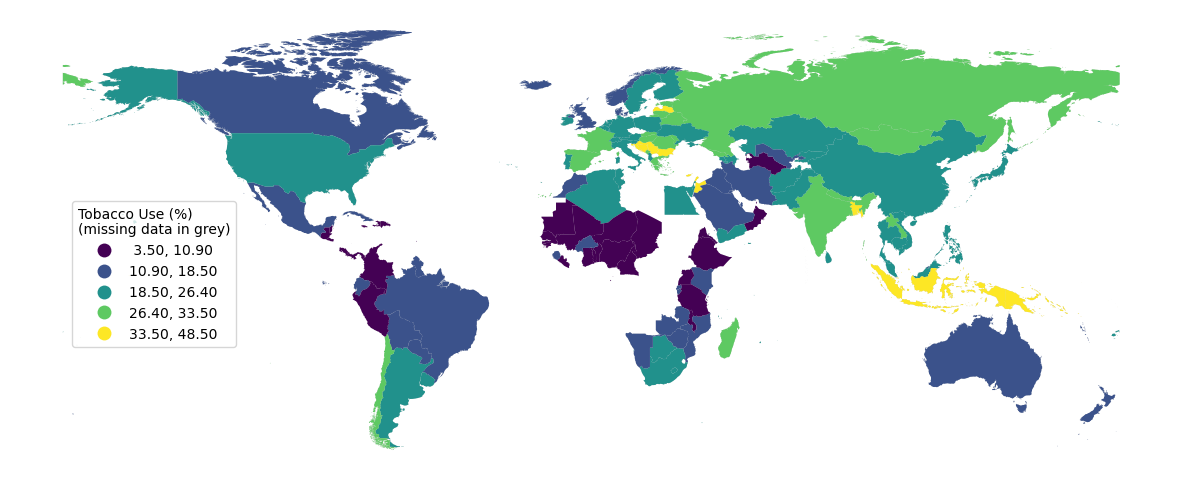

In [24]:
 # Step2#2.Use the scheme you found in the previous step to bin the  columns on alcohol. 
base=cia.plot(color='lightgrey',
                     figsize=(15, 10))
cia.plot(column='TobaccoUse_perc', cmap='viridis', ax=base,
                     scheme="fisher_jenks",
                     linewidth=0., 
                     legend=True,
                     legend_kwds={"title": "Tobacco Use (%)\n(missing data in grey)"}
                   )
leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.6)) #(left, bottom)
base.set_axis_off()
plt.show();


In [25]:
 # Step 3 Find the countries that are doing the best in all three variables

#Create a new 'obesity_code" variable use the best scheme  'Fisher Jenks'
cia['obesity_code'] = fj5.yb #yb` contains classification labels (0 to 4)

# A copy in another column
cia['obesity_levels'] = cia['obesity_code']  

# Define the mapping of numeric codes to category labels
newLevels = {0: '1.very low', 1: '2.low', 2: '3.average', 3: '4.high', 4: '5.very high'}

# Replace numerical codes with descriptive labels
cia['obesity_levels'] = cia['obesity_levels'].replace(newLevels)



In [26]:

# Find the best countries
cia["BestCountries"] = cia["tobacco_code"] + cia["alcohol_code"] + cia["obesity_code"]


BestCountries = cia[cia["BestCountries"] == 0]


BestCountries.shape



(10, 15)

In [27]:
BestCountries  # The best countries are as below: Benin, Chad, Eritrea, Ethiopia,Chana, Mali, Mauritania,Niger,Senegal,Togo

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,geometry,obesity_code,obesity_levels,BestCountries
17,Benin,Benin,Africa,9.6,6.9,1.25,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((2.73295 7.65821, 2.73222 7.651...",0,1.very low,0
26,Chad,Chad,Africa,6.1,8.3,0.55,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((14.19477 9.98175, 14.45055 9.9...",0,1.very low,0
42,Eritrea,Eritrea,Africa,5.0,7.5,0.93,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((42.06777 13.69778, 42.09027 13...",0,1.very low,0
44,Ethiopia,Ethiopia,Africa,4.5,5.1,1.16,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((45.4894 5.48976, 45.37447 5.36...",0,1.very low,0
49,Ghana,Ghana,Africa,10.9,3.5,1.59,0,1.very low,1. below5,0,1.very low,"MULTIPOLYGON (((0.32238 6.03584, 0.35375 6.023...",0,1.very low,0
83,Mali,Mali,Africa,8.6,8.3,0.60,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((-9.86522 12.05481, -9.91195 12...",0,1.very low,0
86,Mauritania,Mauritania,Africa,12.7,10.7,0.00,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((-6.33596 22.99026, -6.32583 22...",0,1.very low,0
94,Niger,Niger,Africa,5.5,7.4,0.11,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((7.02806 12.99577, 6.94222 12.9...",0,1.very low,0
118,Senegal,Senegal,Africa,8.8,6.9,0.25,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((-14.34175 12.67889, -14.39306 ...",0,1.very low,0
128,Togo,Togo,Africa,8.4,6.8,1.40,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((1.65542 7.52977, 1.65014 7.513...",0,1.very low,0


In [28]:
cia.to_file('/Users/jinxianiu/Documents/GitHub/HW1_repo/cia.gpkg', driver='GPKG', layer='cia') 
 